
# Audio Datasets
``torchaudio`` ortak veri kümeleridir, herkesin erişebileceği kolay erişim sağlar. Dataset listesi için lütfen resmi belgelere bakın.



In [2]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

1.13.1+cu116
0.13.1+cu116


## Verileri ve yardımcı fonksiyonları hazırlama

In [3]:
import os

import matplotlib.pyplot as plt
from IPython.display import Audio, display


_SAMPLE_DIR = "_assets"
YESNO_DATASET_PATH = os.path.join(_SAMPLE_DIR, "yes_no")
os.makedirs(YESNO_DATASET_PATH, exist_ok=True)


def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)


def play_audio(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape
    if num_channels == 1:
        display(Audio(waveform[0], rate=sample_rate))
    elif num_channels == 2:
        display(Audio((waveform[0], waveform[1]), rate=sample_rate))
    else:
        raise ValueError("Waveform with more than 2 channels are not supported.")

`torchaudio.datasets.YESNO` veri setini  nasıl kullanılacağını gösteriyoruz




  0%|          | 0.00/4.49M [00:00<?, ?B/s]

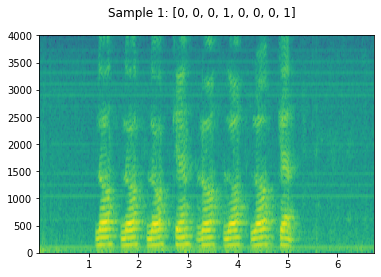

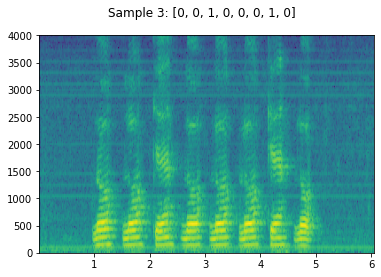

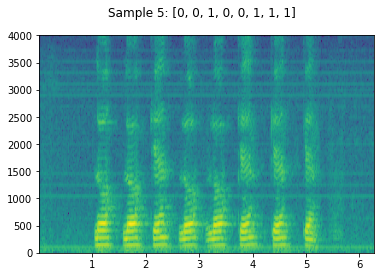

In [4]:
dataset = torchaudio.datasets.YESNO(YESNO_DATASET_PATH, download=True)

for i in [1, 3, 5]:
    waveform, sample_rate, label = dataset[i]
    plot_specgram(waveform, sample_rate, title=f"Sample {i}: {label}")
    play_audio(waveform, sample_rate)